In [6]:
import random
import pylab

''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

'\nEnd helper code\n'

In [7]:
random.seed(0)  # Comment out for real testing

## Problem 1

We simply model the virus population inside a patient as if it were left untreated.

Fill the `SimpleVirus` and the `Patient` classes.



In [78]:
#
# PROBLEM 1
#
class SimpleVirus(object):
    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        outcome = random.random()
        if outcome <= self.getClearProb():
            return True        
        else:
            return False
            
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. 
        
        The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """
        outcome = random.random()
        ReproductionProb = self.maxBirthProb * (1 - popDensity)
        
        if outcome <= ReproductionProb:
            Child = SimpleVirus(self.maxBirthProb, self.clearProb)
            return Child
        else:
            raise NoChildException("The virus did not reproduce.")


In [79]:
class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses[:]

    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop

    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.getViruses())

    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
        survivingViruses = []
        for virus in self.getViruses():
            if not virus.doesClear():
                survivingViruses.append(virus)
        self.viruses = survivingViruses                
        
        popDensity = self.getTotalPop() / self.getMaxPop()
        
        newViruses = []
        for virus in self.getViruses():
            newViruses.append(virus)
            try:
                Child = virus.reproduce(popDensity)
                newViruses.append(Child)
            except NoChildException:
                pass
        self.viruses = newViruses
        
        return self.getTotalPop()

## Problem 2

Fill in the function   
`simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials)`  
that instantiates a Patient, 
simulates changes to the virus population for 300 time steps (i.e., 300 calls to update), 
and plots the average size of the virus population as a function of time; 
that is, the x-axis should correspond to the number of elapsed time steps, 
and the y-axis should correspond to the average size of the virus population in the patient.
The population at time=0 is the population after the first call to update.

In [80]:
#
# PROBLEM 2
#
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials, numTimeSteps=300):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    # 1. This list will be used for the plot
    partial_result = []
    for timestep in range(numTimeSteps):
        partial_result.append(0)
    
    for i in range(numTrials):
        # 2. Trial setup
        PatientViruses = []
        for j in range(numViruses):
            PatientViruses.append(SimpleVirus(maxBirthProb, clearProb))
        
        TrialPatient = Patient(PatientViruses, maxPop)
        
        # 3. Simulate numTimeSteps timesteps
        for k in range(numTimeSteps):
            TotalPobAtk = TrialPatient.update()
            partial_result[k] += TotalPobAtk
    
    # 4. Calculate result and populate time axis
    result = partial_result
    for l in range(numTimeSteps):
        result[l] = result[l] / numTrials
    
    # 5. Plot time (pylab.plot()'s default) vs result
        # 5.1 Setup figure
    pylab.figure()
        # 5.2 Populate graph
    #pylab.ylim(0, maxPop)  # Fix the limit for the y axis, so it doesn't change each run
    pylab.plot(result, label = "SimpleVirus")
        # 5.3 Add labels
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
        # 5.4 Show figure
    pylab.show()        

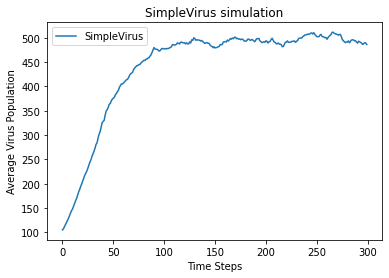

In [77]:
simulationWithoutDrug(numViruses=100, maxPop=1000, maxBirthProb=0.1, 
                      clearProb=0.05, numTrials=10)

## Problem 3

In this problem, we consider the effects of both administering drugs to the patient and the ability of virus particle offsprings to inherit or mutate genetic traits that confer drug resistance.
As the virus population reproduces, mutations will occur in the virus offspring, adding genetic diversity to the virus population. 
Some virus particles gain favorable mutations that confer resistance to drugs.

In order to model this effect, implement the `ResistantVirus` class:
it maintains the state of a virus particle's drug resistances, and accounts for the inheritance of drug resistance traits to offspring. 

In [93]:
#
# PROBLEM 3
#
class ResistantVirus(SimpleVirus):
    """
    Representation of a virus which can have drug resistance.
    """   

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Initialize a ResistantVirus instance, saves all parameters as attributes
        of the instance.

        maxBirthProb: Maximum reproduction probability (a float between 0-1)       

        clearProb: Maximum clearance probability (a float between 0-1).

        resistances: A dictionary of drug names (strings) mapping to the state
        of this virus particle's resistance (either True or False) to each drug.
        e.g. {'guttagonol':False, 'srinol':False}, means that this virus
        particle is resistant to neither guttagonol nor srinol.

        mutProb: Mutation probability for this virus particle (a float). This is
        the probability of the offspring acquiring or losing resistance to a drug.
        """
        SimpleVirus.__init__(self, maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb

    def getResistances(self):
        """
        Returns the resistances for this virus.
        """
        return self.resistances.copy()

    def getMutProb(self):
        """
        Returns the mutation probability for this virus.
        """
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Get the state of this virus particle's resistance to a drug. This method
        is called by getResistPop() in TreatedPatient to determine how many virus
        particles have resistance to a drug.       

        drug: The drug (a string)

        returns: True if this virus instance is resistant to the drug, False
        otherwise.
        """
        try:
            return self.getResistances()[drug]
        except KeyError:
            return False

    def reproduce(self, popDensity, activeDrugs):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A virus particle will only reproduce if it is resistant to ALL the drugs
        in the activeDrugs list. For example, if there are 2 drugs in the
        activeDrugs list, and the virus particle is resistant to 1 or no drugs,
        then it will NOT reproduce.

        Hence, if the virus is resistant to all drugs
        in activeDrugs, then the virus reproduces with probability:      

        self.maxBirthProb * (1 - popDensity).                       

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring ResistantVirus (which has the same
        maxBirthProb and clearProb values as its parent). The offspring virus
        will have the same maxBirthProb, clearProb, and mutProb as the parent.

        For each drug resistance trait of the virus (i.e. each key of
        self.resistances), the offspring has probability 1-mutProb of
        inheriting that resistance trait from the parent, and probability
        mutProb of switching that resistance trait in the offspring.       

        For example, if a virus particle is resistant to guttagonol but not
        srinol, and self.mutProb is 0.1, then there is a 10% chance that
        that the offspring will lose resistance to guttagonol and a 90%
        chance that the offspring will be resistant to guttagonol.
        There is also a 10% chance that the offspring will gain resistance to
        srinol and a 90% chance that the offspring will not be resistant to
        srinol.

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population       

        activeDrugs: a list of the drug names acting on this virus particle
        (a list of strings).

        returns: a new instance of the ResistantVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        ReproductionFlag = True
        
        for drug in activeDrugs:
            if self.isResistantTo(drug) == False:
                ReproductionFlag = False
                break
        
        if ReproductionFlag: 
            outcome = random.random()
            ReproductionProb = self.maxBirthProb * (1 - popDensity)
            
            if outcome <= ReproductionProb:
                # Generate a new resistances dictionary for the child
                ChildResistances = self.getResistances()
                for k in ChildResistances.keys():
                    mutOutcome = random.random()
                    if mutOutcome <= self.getMutProb():  # Mutation
                        ChildResistances[k] = not ChildResistances[k]
                    # else, the resistance stays the same as the parent's
                
                # Generate and return Child
                Child = ResistantVirus(self.maxBirthProb, self.clearProb, ChildResistances, self.mutProb)
                return Child
            
            # Raise exceptions if the Virus doesn't reproduce
            else:
                raise NoChildException("The virus did not reproduce.")       
        else:
            raise NoChildException("The virus did not reproduce.")

In [94]:
virus = ResistantVirus(0.0, 1.0, {"drug1":True, "drug2":False}, 0.0)

In [96]:
virus.reproduce(0, ["drug3"])

NoChildException: The virus did not reproduce.

## Problem 4

We also need a representation for a patient that accounts for the use of drug treatments and manages a collection of `ResistantVirus` instances.
For this, we introduce the `TreatedPatient` class, which is a subclass of `Patient`:
it must make use of the new methods in `ResistantVirus` and maintain the list of drugs that are administered to the patient.


In [97]:
#
# PROBLEM 4
#

class TreatedPatient(Patient):
    """
    Representation of a patient. The patient is able to take drugs and his/her
    virus population can acquire resistance to the drugs he/she takes.
    """

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of drugs being administered
        (which should initially include no drugs).              

        viruses: The list representing the virus population (a list of
        virus instances)

        maxPop: The  maximum virus population for this patient (an integer)
        """
        Patient.__init__(self, viruses, maxPop)
        self.drugs = []

    def addPrescription(self, newDrug):
        """
        Administer a drug to this patient. After a prescription is added, the
        drug acts on the virus population for all subsequent time steps. If the
        newDrug is already prescribed to this patient, the method has no effect.

        newDrug: The name of the drug to administer to the patient (a string).

        postcondition: The list of drugs being administered to a patient is updated
        """
        if not newDrug in self.drugs:
            self.drugs.append(newDrug)

    def getPrescriptions(self):
        """
        Returns the drugs that are being administered to this patient.

        returns: The list of drug names (strings) being administered to this
        patient.
        """
        return self.drugs[:]

    def getResistPop(self, drugResist):
        """
        Get the population of virus particles resistant to the drugs listed in
        drugResist.       

        drugResist: Which drug resistances to include in the population (a list
        of strings - e.g. ['guttagonol'] or ['guttagonol', 'srinol'])

        returns: The population of viruses (an integer) with resistances to all
        drugs in the drugResist list.
        """
        ResistantPopulation = 0
        for virus in self.getViruses():
            ResistanceToAllFlag = True
            
            for drug in drugResist:
                if not virus.isResistantTo(drug):
                    ResistanceToAllFlag = False
                    break
            if ResistanceToAllFlag:           
                ResistantPopulation += 1
                    
        return ResistantPopulation


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute these actions in order:

        - Determine whether each virus particle survives and update the list of
          virus particles accordingly

        - The current population density is calculated. This population density
          value is used until the next call to update().

        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.
          The list of drugs being administered should be accounted for in the
          determination of whether each virus particle reproduces.

        returns: The total virus population at the end of the update (an
        integer)
        """
        survivingViruses = []
        for virus in self.getViruses():
            if not virus.doesClear():
                survivingViruses.append(virus)
        self.viruses = survivingViruses                
        
        popDensity = self.getTotalPop() / self.getMaxPop()
        
        newViruses = []
        for virus in self.getViruses():
            newViruses.append(virus)
            try:
                Child = virus.reproduce(popDensity, self.getPrescriptions())
                newViruses.append(Child)
            except NoChildException:
                pass
        self.viruses = newViruses
        
        return self.getTotalPop()


In [118]:
# Test
virus1 = ResistantVirus(1.0, 0.0, {"drug1": True}, 0.0)
virus2 = ResistantVirus(1.0, 0.0, {"drug1": False}, 0.0)
patient = TreatedPatient([virus1, virus2], 1000000)
patient.addPrescription("drug1")

# Updating patient 5 times
for i in range(5):
    patient.update()
    
# Expect resistant population to be 2^5 +/- 10
print((2 ** 5) - 10 <= patient.getTotalPop() <= (2 ** 5) + 10 ) 

True


## Problem 5

You will create a `TreatedPatient` instance with the following parameters, then run the simulation:  
`viruses`, a list of 100 ResistantVirus instances  
`maxPop`, maximum sustainable virus population = 1000  

Each `ResistantVirus` instance in the viruses list should be initialized with the following parameters:  
`maxBirthProb`, maximum reproduction probability for a virus particle = 0.1  
`clearProb`, maximum clearance probability for a virus particle = 0.05  
`resistances`, The virus's genetic resistance to drugs in the experiment = {'guttagonol': False}  
`mutProb`, probability of a mutation in a virus particle's offspring = 0.005  

In [134]:
#
# PROBLEM 5
#
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, 
                       resistances, mutProb, numTrials, numTimeSteps=150, 
                       toAddPrescriptions=["guttagonol"]):
    """
    Runs simulations and plots graphs for problem 5.

    For each of numTrials trials, instantiates a patient, runs a simulation for
    150 timesteps, adds guttagonol, and runs the simulation for an additional
    150 timesteps.  At the end plots the average virus population size
    (for both the total virus population and the guttagonol-resistant virus
    population) as a function of time.

    numViruses: number of ResistantVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: maximum clearance probability (a float between 0-1)
    resistances: a dictionary of drugs that each ResistantVirus is resistant to
                 (e.g., {'guttagonol': False})
    mutProb: mutation probability for each ResistantVirus particle
             (a float between 0-1). 
    numTrials: number of simulation runs to execute (an integer)
    
    """
    # 1. This list will be used for the plot
    totalpop_partial_result = []
    drugrespop_partial_result = []
    for timestep in range(numTimeSteps*2):
        totalpop_partial_result.append(0)
        drugrespop_partial_result.append(0)
    
    
    for i in range(numTrials):
        # 2. Trial setup
        PatientViruses = []
        for j in range(numViruses):
            PatientViruses.append(ResistantVirus(maxBirthProb, clearProb, 
                                                 resistances, mutProb))
        TrialPatient = TreatedPatient(PatientViruses, maxPop)
        
        # 3.1 Simulate numTimeSteps timesteps without drug prescription
        for k in range(numTimeSteps):
            TotalPobAtk = TrialPatient.update()
            ResistantPobAtk = TrialPatient.getResistPop(toAddPrescriptions)
            totalpop_partial_result[k] += TotalPobAtk
            drugrespop_partial_result[k] += ResistantPobAtk
        
        # 3.2 Add a prescription and simulate numTimeSteps more timesteps
        for newDrug in toAddPrescriptions:
            TrialPatient.addPrescription(newDrug)
        for k in range(numTimeSteps, (numTimeSteps * 2)):
            TotalPobAtk = TrialPatient.update()
            ResistantPobAtk = TrialPatient.getResistPop(toAddPrescriptions)
            totalpop_partial_result[k] += TotalPobAtk
            drugrespop_partial_result[k] += ResistantPobAtk
        
    
    # 4. Calculate result 
    totalpop_result = totalpop_partial_result
    drugrespop_result = drugrespop_partial_result
    for l in range(numTimeSteps * 2):
        totalpop_result[l] = totalpop_result[l] / numTrials
        drugrespop_result[l] = drugrespop_result[l] / numTrials
    
    # 5. Plot time (pylab.plot()'s default) vs result
        # 5.1 Setup figure
    pylab.figure()
        # 5.2 Populate graph
    #pylab.ylim(0, maxPop)  # Fix the limit for the y axis, so it doesn't change each run
    pylab.plot(totalpop_result, label = "Total Viruses")
    pylab.plot(drugrespop_result, label = "Resistant Viruses")
        # 5.3 Add labels
    pylab.title("ResistantVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
        # 5.4 Show figure
    pylab.show()  

In [135]:
simulationWithDrug(numViruses=100, maxPop=1000, maxBirthProb=0.1, clearProb=0.05, 
                   resistances={"guttagonol": False}, mutProb=0.005, numTrials=100, 
                   numTimeSteps=150, toAddPrescriptions=["guttagonol"])